# Procedural Generation of Networks
> __Purpose__: The goal of this notebook is to see the effects of different architectures on the action potentials and how it affects their steady states.  This includes:
1. Introducing a way to varying biophysical constants slightly
2. Playing with the weighting of the currents
3. Changing the number of connections present for each neuron
4. Determining the max limits of the current system

In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import network_funcs

COLOR = 'grey'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

In [2]:
#Things that don't need to be assigned every time
t = np.linspace(0,50,2000) #time vector
vI = [0,0,0] #vector needed to control the current
V1 = -58; n1 = 0.05; m1 = 0.33; h1 = 0.6 #Voltage and gating var ICs
#V0: Manipulates the x location placement
V0n1 = -49; V0m1 = -36; V0h1 = -55
#Sigma: Manipulates the steepness, bigger sigma means less steep step
sigman1 = 18; sigmam1 = 10; sigmah1 = -8
#Tau's
tau_n_mean1 = 2.785; tau_m_mean1 = 0.258; tau_h_mean1 = 2.810
node1Base = [V1, n1, m1, h1, 0, 0, 
         V0n1, V0m1, V0h1, 0, 0, 
         sigman1, sigmam1, sigmah1, 0, 0, 
         tau_n_mean1, tau_m_mean1, tau_h_mean1, 0, 0]

# Preliminary Testing: Observing the Effects of s IC
## A) 3 Neuron: Max Case; Bidirectional Symmetric
2, 0.006537, 3, 0.006537 <br/>
1, 0.006537, 3, 0.006537 <br/>
2, 0.006537, 1, 0.006537 <br/>

Burn in run, looking for NO oscillations
Actual run, using a current of 0.1 A @ 5 ms.  Oscillations expected


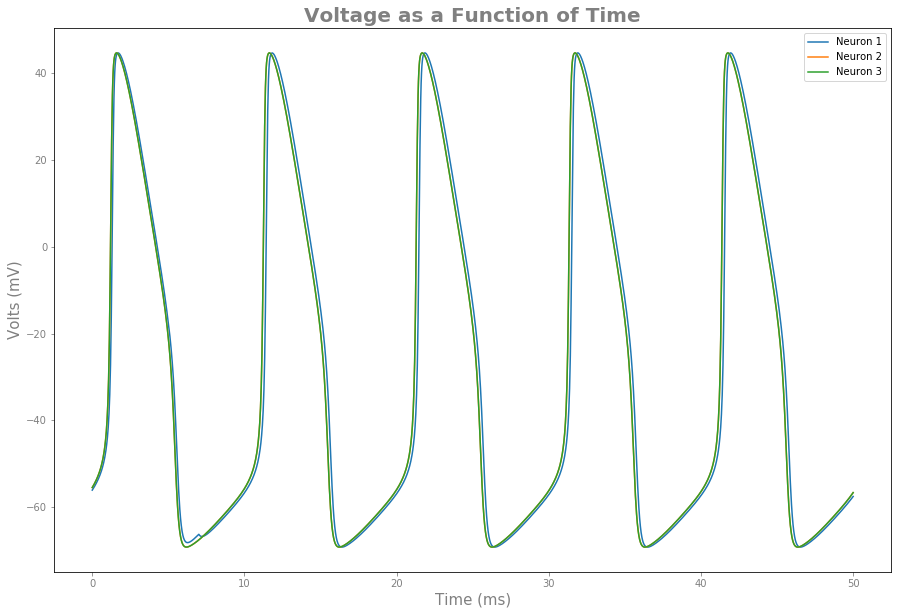

In [4]:
print("Burn in run, looking for NO oscillations")
numNodes = 3 #NEED TO SET THIS
#####################################################################################
node1 = node1Base + ([0]*(numNodes-1))
network_params = node1*numNodes #Letting all nodes be the same
x = odeint(network_funcs.odes_progen,network_params,t,args=(network_funcs.I,vI))
x = np.transpose(x)
#Now grab the burned in values from the previous run
network_params_BI = x[:,-1]
print("Burn in complete")
print("Actual run, using a current of 0.1 A @ 5 ms.  Oscillations expected")
#BURNED IN initial condition
vI = [5,7,0.1]
x = odeint(network_funcs.odes_progen,network_params_BI,t,args=(network_funcs.I,vI))
x = np.transpose(x)
network_funcs.plot_vnmh(x,t,numNodes)
#save_soln("3NMax_BiSy",x)

## B) 3 Neuron: Max Case; No Couplings
2, 0, 3, 0 <br/>
1, 0, 3, 0 <br/>
2, 0, 1, 0 <br/>

Burn in run, looking for NO oscillations


C:\Users\14193\Desktop\Summer2021\Brown\hh-comp\network_funcs.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  x_inf = 1 / (1 + np.exp(-(V-v0)/sigma))
C:\Users\14193\Desktop\Summer2021\Brown\hh-comp\network_funcs.py:143: RuntimeWarning: overflow encountered in exp
  x_inf = 1 / (1 + np.exp(-(V-v0)/sigma))


Actual run, using a current of 0.1 A @ 5 ms.  Oscillations expected


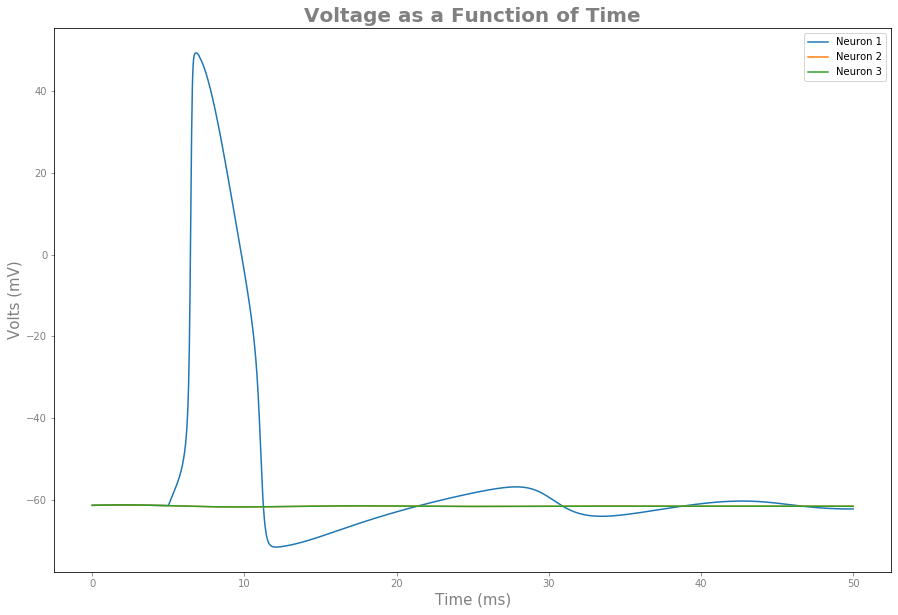

In [5]:
print("Burn in run, looking for NO oscillations")
numNodes = 3 #NEED TO SET THIS
#####################################################################################
node1 = node1Base + ([0]*(numNodes-1))
network_params = node1*numNodes #Letting all nodes be the same
x = odeint(network_funcs.odes_progen,network_params,t,args=(network_funcs.I,vI))
x = np.transpose(x)
#Now grab the burned in values from the previous run
network_params_BI = x[:,-1]
print("Burn in complete")
print("Actual run, using a current of 0.1 A @ 5 ms.  Oscillations expected")
#BURNED IN initial condition
vI = [5,7,0.1]
x = odeint(network_funcs.odes_progen,network_params_BI,t,args=(network_funcs.I,vI))
x = np.transpose(x)
network_funcs.plot_vnmh(x,t,numNodes)
#save_soln("3NMax_NoCs",x)

## C) 3 Neuron: Max Case; Bidirectional Asymmetric (Factor of 2)
2, 0.006537, 3, 0.006537 <br/>
1, 0.013074, 3, 0.013074 <br/>
2, 0.013074, 1, 0.013074 <br/>

Burn in run, looking for NO oscillations


C:\Users\14193\Desktop\Summer2021\Brown\hh-comp\network_funcs.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  x_inf = 1 / (1 + np.exp(-(V-v0)/sigma))
C:\Users\14193\Desktop\Summer2021\Brown\hh-comp\network_funcs.py:143: RuntimeWarning: overflow encountered in exp
  x_inf = 1 / (1 + np.exp(-(V-v0)/sigma))


Burn in complete
Actual run, using a current of 0.1 A @ 5 ms.  Oscillations expected


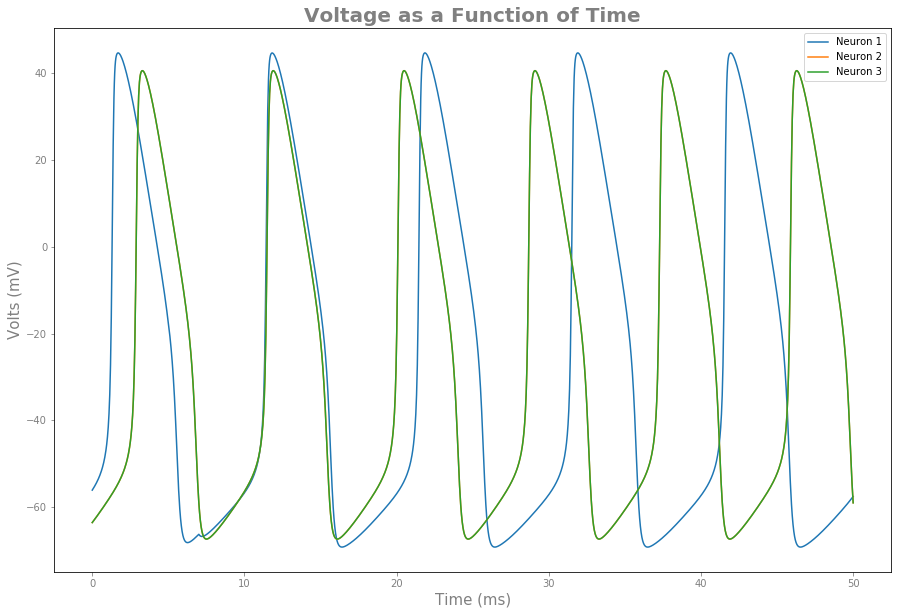

In [8]:
print("Burn in run, looking for NO oscillations")
numNodes = 3 #NEED TO SET THIS
#####################################################################################
node1 = node1Base + ([0]*(numNodes-1))
network_params = node1*numNodes #Letting all nodes be the same
x = odeint(network_funcs.odes_progen,network_params,t,args=(network_funcs.I,vI))
x = np.transpose(x)
#Now grab the burned in values from the previous run
network_params_BI = x[:,-1]
print("Burn in complete")
print("Actual run, using a current of 0.1 A @ 5 ms.  Oscillations expected")
#BURNED IN initial condition
vI = [5,7,0.1]
x = odeint(network_funcs.odes_progen,network_params_BI,t,args=(network_funcs.I,vI))
x = np.transpose(x)
network_funcs.plot_vnmh(x,t,numNodes)
#save_soln("3NMax_BiAs_F2",x)

## D) 3 Neuron: Max Case; Bidirectional Asymmetric (Factor of 10)
2, 0.006537, 3, 0.006537 <br/>
1, 0.06537, 3, 0.06537 <br/>
2, 0.06537, 1, 0.06537 <br/>

Burn in run, looking for NO oscillations


C:\Users\14193\Desktop\Summer2021\Brown\hh-comp\network_funcs.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  x_inf = 1 / (1 + np.exp(-(V-v0)/sigma))
C:\Users\14193\Desktop\Summer2021\Brown\hh-comp\network_funcs.py:143: RuntimeWarning: overflow encountered in exp
  x_inf = 1 / (1 + np.exp(-(V-v0)/sigma))


Burn in complete
Actual run, using a current of 0.1 A @ 5 ms.  Oscillations expected


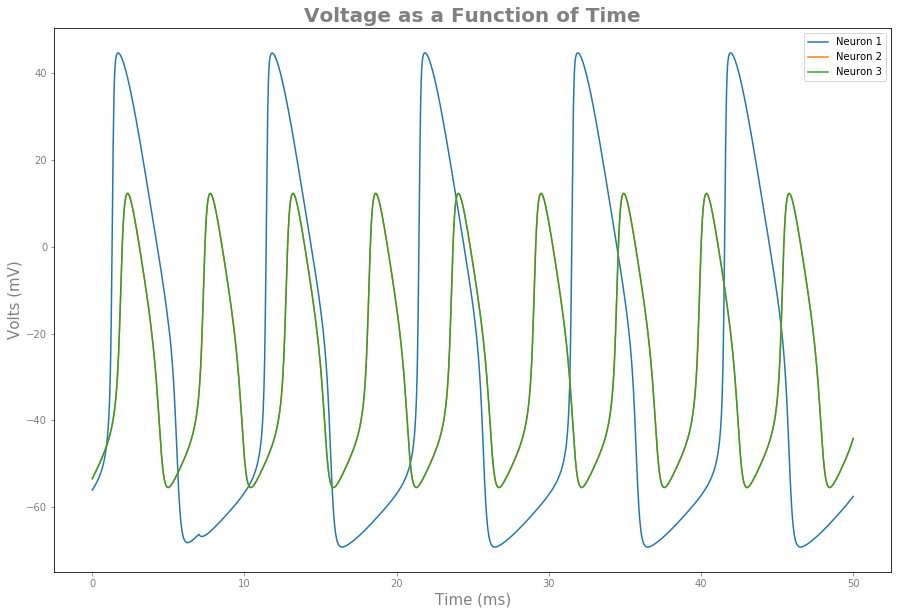

In [7]:
print("Burn in run, looking for NO oscillations")
numNodes = 3 #NEED TO SET THIS
#####################################################################################
node1 = node1Base + ([0]*(numNodes-1))
network_params = node1*numNodes #Letting all nodes be the same
x = odeint(network_funcs.odes_progen,network_params,t,args=(network_funcs.I,vI))
x = np.transpose(x)
#Now grab the burned in values from the previous run
network_params_BI = x[:,-1]
print("Burn in complete")
print("Actual run, using a current of 0.1 A @ 5 ms.  Oscillations expected")
#BURNED IN initial condition
vI = [5,7,0.1]
x = odeint(network_funcs.odes_progen,network_params_BI,t,args=(network_funcs.I,vI))
x = np.transpose(x)
network_funcs.plot_vnmh(x,t,numNodes)
#save_soln("3NMax_BiAs_F10",x)

## E) 3 Neuron: Max Case; Bidirectional Asymmetric (2: Factor of 2; 3: Factor of 10)
2, 0.006537, 3, 0.006537 <br/>
1, 0.013074, 3, 0.013074 <br/>
2, 0.06537, 1, 0.06537 <br/>

Burn in run, looking for NO oscillations


C:\Users\14193\Desktop\Summer2021\Brown\hh-comp\network_funcs.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  x_inf = 1 / (1 + np.exp(-(V-v0)/sigma))
C:\Users\14193\Desktop\Summer2021\Brown\hh-comp\network_funcs.py:143: RuntimeWarning: overflow encountered in exp
  x_inf = 1 / (1 + np.exp(-(V-v0)/sigma))


Burn in complete
Actual run, using a current of 0.1 A @ 5 ms.  Oscillations expected


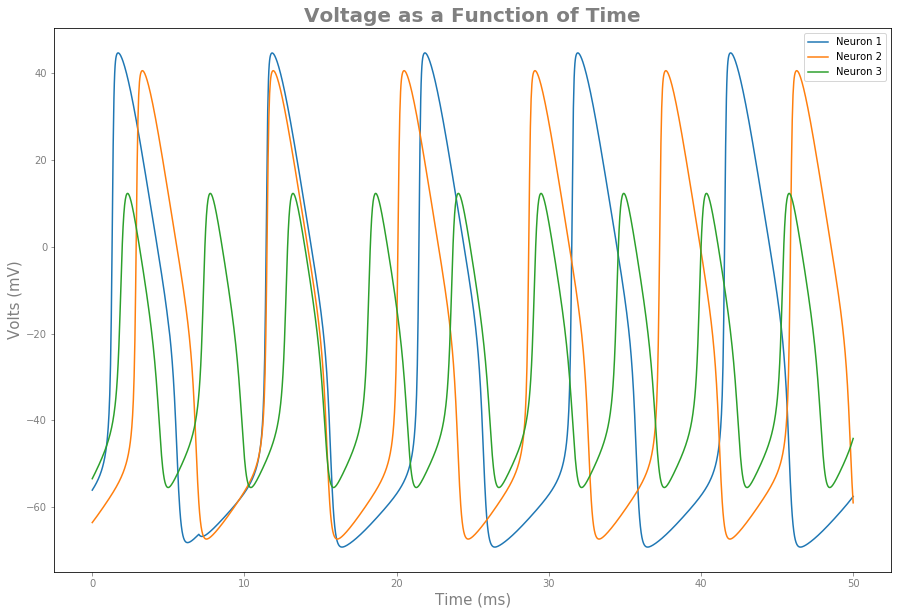

In [9]:
print("Burn in run, looking for NO oscillations")
numNodes = 3 #NEED TO SET THIS
#####################################################################################
node1 = node1Base + ([0]*(numNodes-1))
network_params = node1*numNodes #Letting all nodes be the same
x = odeint(network_funcs.odes_progen,network_params,t,args=(network_funcs.I,vI))
x = np.transpose(x)
#Now grab the burned in values from the previous run
network_params_BI = x[:,-1]
print("Burn in complete")
print("Actual run, using a current of 0.1 A @ 5 ms.  Oscillations expected")
#BURNED IN initial condition
vI = [5,7,0.1]
x = odeint(network_funcs.odes_progen,network_params_BI,t,args=(network_funcs.I,vI))
x = np.transpose(x)
network_funcs.plot_vnmh(x,t,numNodes)
#save_soln("3NMax_BiAs_F2F10",x)

# Actively Trying to Break the Simulations
## Test 1: Find the biggest s values that break the sim
- Conclusion: After around 0.015, the AP starts to lose height and increase in frequency.  Steady decline until eventually no APs occur at all.  In between are suspect APs, in that they occur but may only have a range of 20 or 40, so biologically they aren't APs but rather pure simulation.

Burn in run, looking for NO oscillations


C:\Users\14193\Desktop\Summer2021\Brown\hh-comp\network_funcs.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  x_inf = 1 / (1 + np.exp(-(V-v0)/sigma))
C:\Users\14193\Desktop\Summer2021\Brown\hh-comp\network_funcs.py:143: RuntimeWarning: overflow encountered in exp
  x_inf = 1 / (1 + np.exp(-(V-v0)/sigma))


Burn in complete
Actual run, using a current of 0.1 A @ 5 ms.  Oscillations expected


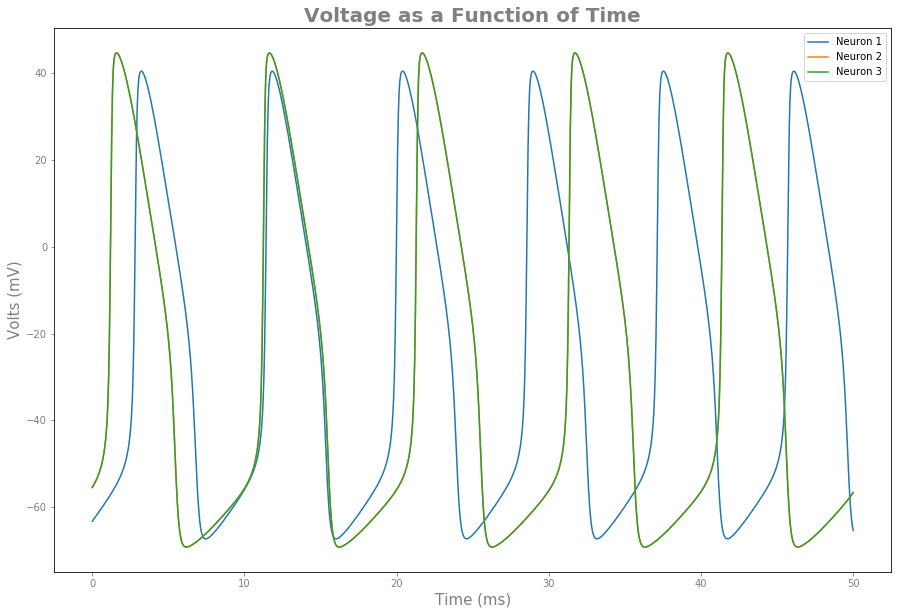

In [19]:
print("Burn in run, looking for NO oscillations")
numNodes = 3 #NEED TO SET THIS
#####################################################################################
node1 = node1Base + ([0]*(numNodes-1))
network_params = node1*numNodes #Letting all nodes be the same
x = odeint(network_funcs.odes_progen,network_params,t,args=(network_funcs.I,vI))
x = np.transpose(x)
#Now grab the burned in values from the previous run
network_params_BI = x[:,-1]
print("Burn in complete")
print("Actual run, using a current of 0.1 A @ 5 ms.  Oscillations expected")
#BURNED IN initial condition
vI = [5,7,0.1]
x = odeint(network_funcs.odes_progen,network_params_BI,t,args=(network_funcs.I,vI))
x = np.transpose(x)
network_funcs.plot_vnmh(x,t,numNodes)

## Test 2: Find the smallest s values that break the sim
- Conclusion: Can essentially go arbitrarily small, 0.0000000000001 does not break the sim

Burn in run, looking for NO oscillations


C:\Users\14193\Desktop\Summer2021\Brown\hh-comp\network_funcs.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  x_inf = 1 / (1 + np.exp(-(V-v0)/sigma))
C:\Users\14193\Desktop\Summer2021\Brown\hh-comp\network_funcs.py:143: RuntimeWarning: overflow encountered in exp
  x_inf = 1 / (1 + np.exp(-(V-v0)/sigma))


Burn in complete
Actual run, using a current of 0.1 A @ 5 ms.  Oscillations expected


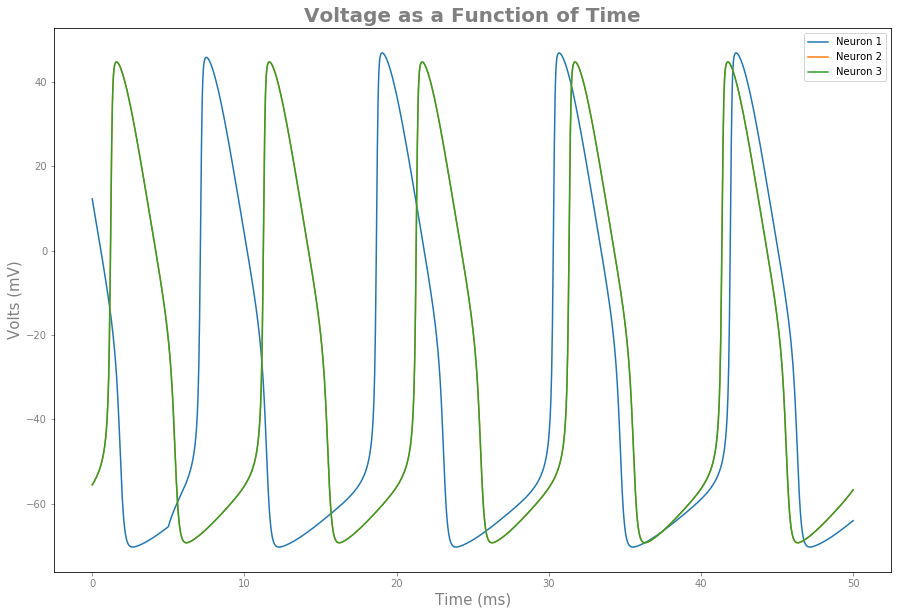

In [23]:
print("Burn in run, looking for NO oscillations")
numNodes = 3 #NEED TO SET THIS
#####################################################################################
node1 = node1Base + ([0]*(numNodes-1))
network_params = node1*numNodes #Letting all nodes be the same
x = odeint(network_funcs.odes_progen,network_params,t,args=(network_funcs.I,vI))
x = np.transpose(x)
#Now grab the burned in values from the previous run
network_params_BI = x[:,-1]
print("Burn in complete")
print("Actual run, using a current of 0.1 A @ 5 ms.  Oscillations expected")
#BURNED IN initial condition
vI = [5,7,0.1]
x = odeint(network_funcs.odes_progen,network_params_BI,t,args=(network_funcs.I,vI))
x = np.transpose(x)
network_funcs.plot_vnmh(x,t,numNodes)

## Test 3: Do randomly distributed s values within the above bounds break the sim?
- Conclusion: Still works
2, 0.0051, 3, 0.00008537 <br/>
1, 0.01347, 3, 0.057 <br/>
2, 0.00037, 1, 0.001117 <br/>

Burn in run, looking for NO oscillations
Burn in complete
Actual run, using a current of 0.1 A @ 5 ms.  Oscillations expected


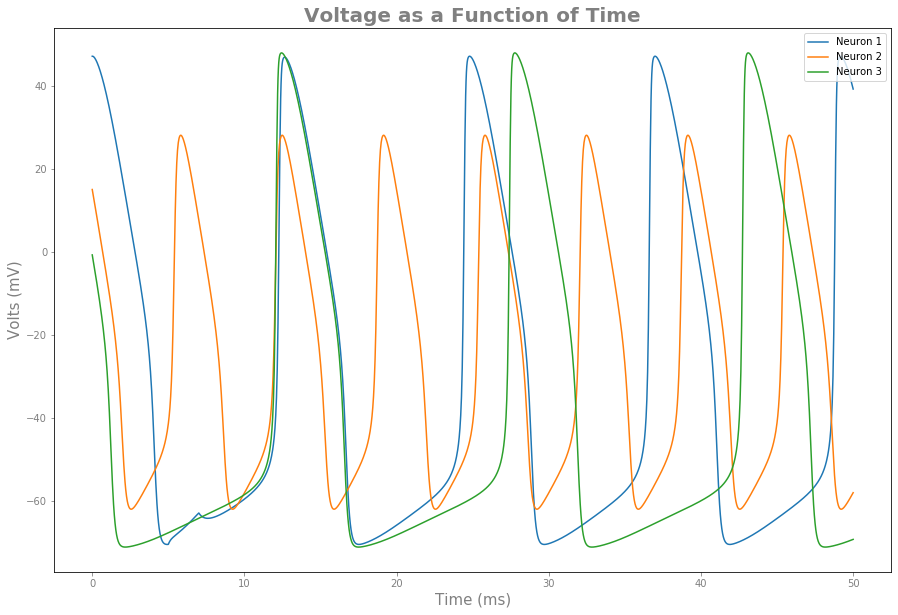

In [25]:
print("Burn in run, looking for NO oscillations")
numNodes = 3 #NEED TO SET THIS
#####################################################################################
node1 = node1Base + ([0]*(numNodes-1))
network_params = node1*numNodes #Letting all nodes be the same
x = odeint(network_funcs.odes_progen,network_params,t,args=(network_funcs.I,vI))
x = np.transpose(x)
#Now grab the burned in values from the previous run
network_params_BI = x[:,-1]
print("Burn in complete")
print("Actual run, using a current of 0.1 A @ 5 ms.  Oscillations expected")
#BURNED IN initial condition
vI = [5,7,0.1]
x = odeint(network_funcs.odes_progen,network_params_BI,t,args=(network_funcs.I,vI))
x = np.transpose(x)
network_funcs.plot_vnmh(x,t,numNodes)